In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from facebook_scraper import get_posts, get_profile
import datetime
import json

![separator2](https://i.imgur.com/4gX5WFr.png)

# Cleaning Data 

In [66]:
raw_df = pd.read_csv('Data/DataEatingSleepingWithOP.csv')

In [67]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        300 non-null    int64  
 1   text                           277 non-null    object 
 2   post_text                      277 non-null    object 
 3   shared_text                    3 non-null      object 
 4   original_text                  3 non-null      object 
 5   time                           300 non-null    object 
 6   timestamp                      300 non-null    int64  
 7   image                          252 non-null    object 
 8   image_lowquality               297 non-null    object 
 9   images                         300 non-null    object 
 10  images_description             300 non-null    object 
 11  images_lowquality              300 non-null    object 
 12  images_lowquality_description  300 non-null    obj

In [68]:
raw_df.drop_duplicates()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,741647091330800,Quảng cáo phần Đảo Tương lai Egghead với Vegap...,Quảng cáo phần Đảo Tương lai Egghead với Vegap...,NaN,NaN,2023-11-26 14:58:50,1700985530,NaN,https://scontent.fhan4-3.fna.fbcdn.net/v/t15.5...,[],...,https://www.facebook.com/EatingSleepingWithOP/...,"{'thích': 251, 'yêu thích': 88, 'haha': 4, 'th...",347,NaN,184858891540595,NaN,NaN,[],False,2023-11-26 16:44:16.652226
1,741535364675306,Một nhân vật mới sẽ xuất hiện ở arc Egghead. N...,Một nhân vật mới sẽ xuất hiện ở arc Egghead. N...,NaN,NaN,2023-11-26 09:23:28,1700965408,NaN,https://scontent.fhan3-3.fna.fbcdn.net/v/t39.3...,[],...,https://www.facebook.com/EatingSleepingWithOP/...,"{'thích': 1608, 'yêu thích': 60, 'haha': 428, ...",2119,NaN,184858891540595,NaN,7.415353e+14,['741535334675309'],False,2023-11-26 16:44:24.964252
2,741527888009387,Áp phích quảng bá chính thức cho phần Egghead ...,Áp phích quảng bá chính thức cho phần Egghead ...,NaN,NaN,2023-11-26 08:59:44,1700963984,https://scontent.fhan4-2.fna.fbcdn.net/v/t39.3...,https://scontent.fhan4-2.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan4-2.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/EatingSleepingWithOP/...,"{'thích': 1413, 'yêu thích': 608, 'haha': 5, '...",2066,NaN,184858891540595,NaN,7.415273e+14,['741527261342783'],False,2023-11-26 16:44:58.066677
3,741264904702352,Một số hình ảnh quảng cáo mới cho tập 1085 của...,Một số hình ảnh quảng cáo mới cho tập 1085 của...,NaN,NaN,2023-11-25 20:32:49,1700919169,https://scontent.fhan4-2.fna.fbcdn.net/v/t39.3...,https://scontent.fhan4-2.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan4-2.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/EatingSleepingWithOP/...,"{'thích': 736, 'yêu thích': 155, 'haha': 3, 'w...",902,NaN,184858891540595,NaN,NaN,[],False,2023-11-26 16:45:14.078131
4,740804658081710,"Chúc mừng sinh nhật, Charlotte Katakuri.","Chúc mừng sinh nhật, Charlotte Katakuri.",NaN,NaN,2023-11-25 00:00:11,1700845211,https://scontent.fhan3-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan3-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan3-3.fna.fbcdn.net/v/t39...,...,https://www.facebook.com/EatingSleepingWithOP/...,"{'thích': 2000, 'yêu thích': 884, 'haha': 5, '...",2924,NaN,184858891540595,NaN,7.408044e+14,['740804384748404'],False,2023-11-26 16:45:22.851440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,692296626265847,"Theo những chia sẻ, Giám đốc sản xuất Matt Owe...","Theo những chia sẻ, Giám đốc sản xuất Matt Owe...",NaN,NaN,2023-09-04 22:36:45,1693841805,NaN,https://scontent.fhan4-2.fna.fbcdn.net/v/t15.5...,[],...,NaN,NaN,0,NaN,184858891540595,NaN,NaN,[],False,NaN
296,692277676267742,"Audrey Cymone, diễn viên đóng Kuina trong One ...","Audrey Cymone, diễn viên đóng Kuina trong One ...",NaN,NaN,2023-09-04 21:54:50,1693839290,NaN,https://scontent.fhan3-1.fna.fbcdn.net/v/t15.5...,[],...,NaN,NaN,0,NaN,184858891540595,NaN,NaN,[],False,NaN
297,692224172939759,Động lực để cố gắng là nỗi sợ một ngư...,Động lực để cố gắng là nỗi sợ một ngư...,NaN,NaN,2023-09-04 20:30:15,1693834215,https://scontent.fhan4-1.fna.fbcdn.net/v/t39.3...,https://scontent.fhan4-1.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan4-1.fna.fbcdn.net/v/t39...,...,NaN,NaN,0,NaN,184858891540595,NaN,6.922242e+14,['692224156273094'],False,NaN
298,692189039609939,"Tạo hình trái ác quỷ của ""God"" và ""Ghost Princ...","Tạo hình trái ác quỷ của ""God"" và ""Ghost Princ...",NaN,NaN,2023-09-04 19:28:30,1693830510,https://scontent.fhan3-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan3-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan3-3.fna.fbcdn.net/v/t39...,...,NaN,NaN,0,NaN,184858891540595,NaN,6.921890e+14,['692189022943274'],False,NaN


In [69]:
# Xóa các cột có giá trị null >50
non_null_counts = raw_df.count()
selected_columns = non_null_counts[non_null_counts > 50].index
# Thiết lập dataFram sau khi chọn các cột có giá trị non_null >50
df_filtered = raw_df[selected_columns]

In [70]:
# Xóa các dòng có 'reactor' là NaN
df_filtered = df_filtered.dropna(subset=['reactors'])
# Xóa các cột không cần thiết
df_filtered = df_filtered.drop(columns=['likes'])
# Fill NaN vào các cột dòng thiếu post_text để dễ dàng cho việc phân tích words
df_filtered['post_text'] = df_filtered['post_text'].fillna('ok')

In [71]:
# chuyển time sang dạng datetime
df_filtered['time'] = pd.to_datetime(df_filtered['time'])
# Tạo một cột mới 'day_of_post' để nhóm dữ liệu theo ngày
df_filtered['day_of_post'] = (df_filtered['time'].dt.date) 


<Axes: xlabel='day_of_post', ylabel='reaction_count'>

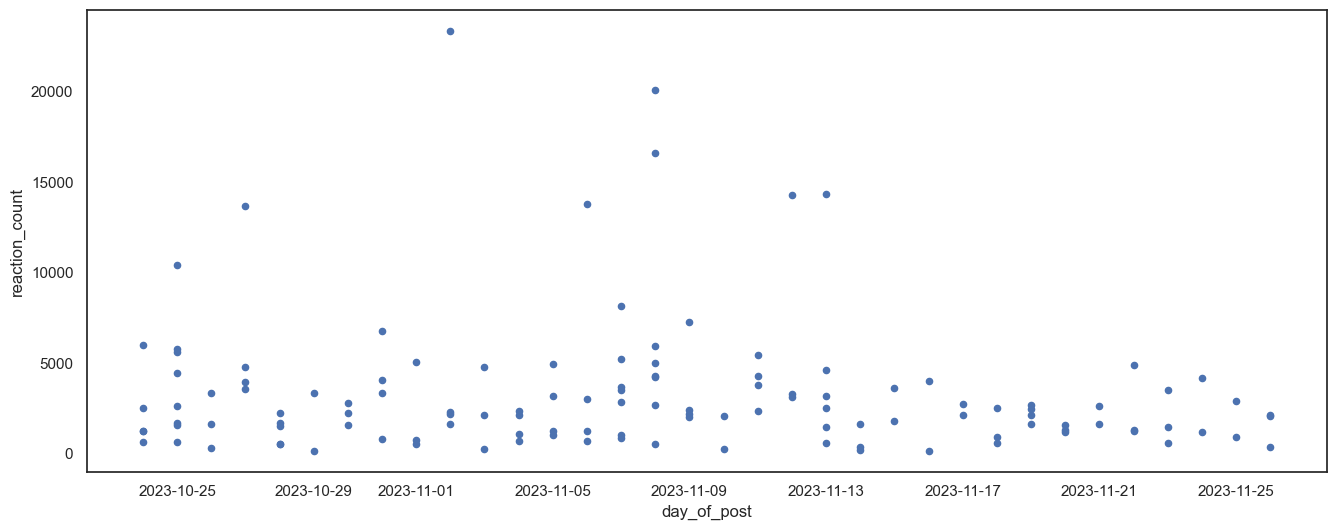

In [72]:
# Vẽ biểu đồ cho 'reaction_count' theo ngày
df_filtered.plot(kind= 'scatter', x = 'day_of_post', y = 'reaction_count', figsize=(16,6), grid=False)



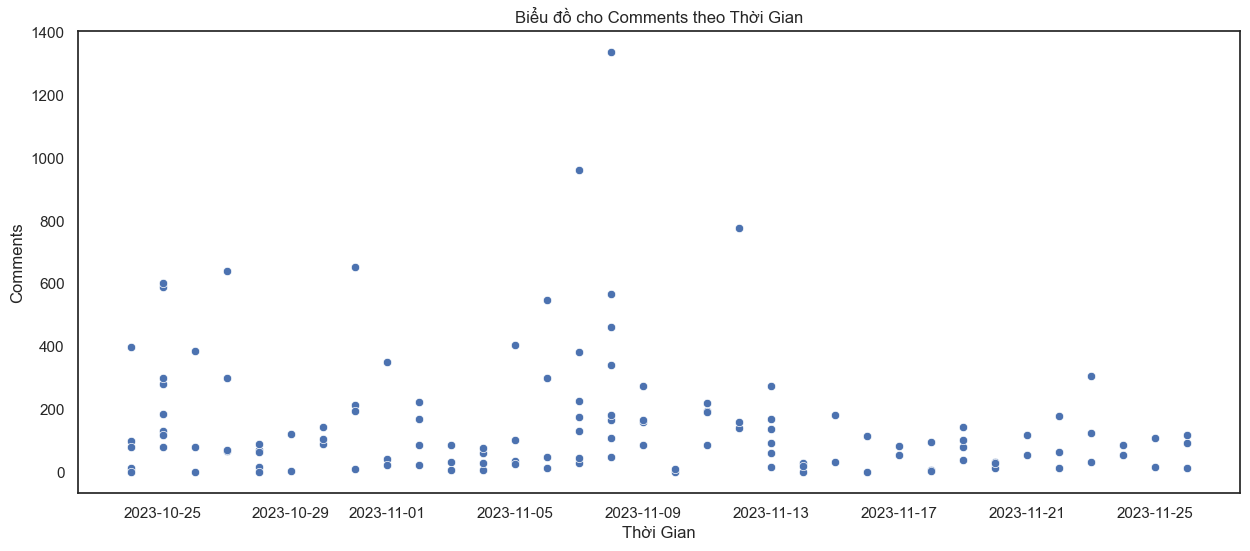

In [73]:
# Vẽ biểu đồ đường cho 'comments' theo thời gian
plt.figure(figsize=(15, 6))
sns.scatterplot(x='day_of_post', y='comments', data=df_filtered, color='b')
plt.title('Biểu đồ cho Comments theo Thời Gian')
plt.xlabel('Thời Gian')
plt.ylabel('Comments')
plt.show()

có thể thấy dữ liệu về số lượt reaction, comments của các bài viết theo thời gian không có dấu hiệu bất thường

![separator2](https://i.imgur.com/4gX5WFr.png)

# Analyzing


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Tương tác

In [74]:
# Tìm thời gian bài đăng sớm nhất và mới nhất trong bộ dữ liệu
earliest_post_time = df_filtered['time'].min()
latest_post_time = df_filtered['time'].max()

In [75]:
# In ra kết quả
print("Thời gian bài đăng sớm nhất:", earliest_post_time)
print("Thời gian bài đăng mới nhất:", latest_post_time)

Thời gian bài đăng sớm nhất: 2023-10-24 09:26:06
Thời gian bài đăng mới nhất: 2023-11-26 14:58:50


In [76]:
# Tính tổng lượng tương tác (lượt thích + bình luận + chia sẻ) trong 124 bài đăng tính từ ngày 24/10 đến 26/11
df_filtered["total_interactions"] = df_filtered["reaction_count"] + df_filtered["comments"] + df_filtered["shares"]
# Tổng số lượt tương tác với page trong thời gian trên
print("Tổng số lượt tương tác:", df_filtered["total_interactions"].sum())
# In ra kết quả
print("Lượt tương tác trung bình:", int(df_filtered["total_interactions"].mean()))

Tổng số lượt tương tác: 438350
Lượt tương tác trung bình: 3535


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Nhận xét

Số Lượng Bài Đăng: Trong khoảng thời gian từ ngày 24/10 đến 26/11, fanpage đã đăng tổng cộng 124 bài. Điều này cho thấy một mức độ hoạt động ổn định trên trang trong khoảng thời gian đó.

Lượt Tương Tác Trung Bình: Với mức trung bình khoảng 3,535 lượt tương tác mỗi bài đăng, có thể nói rằng fanpage đạt được một mức tương tác khá tốt. Điều này có thể là một dấu hiệu tích cực về sự hấp dẫn của nội dung đối với cộng đồng.

Đánh Giá Hiệu Suất Cao: Nếu so sánh với các tiêu chí chuẩn hoặc với kỳ vọng của fanpage, việc đạt được hơn 3,500 lượt tương tác trung bình mỗi bài đăng là một hiệu suất cao.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [77]:
# Lấy bài viết có lượng tương tác lớn nhất
most_interacted_post = df_filtered.loc[df_filtered["total_interactions"].idxmax()]

# In ra thông tin của bài viết
print("Bài viết có lượng tương tác lớn nhất:")
print(most_interacted_post["post_text"])
print("Lượt thích:", most_interacted_post["reaction_count"])
print("Bình luận:", most_interacted_post["comments"])
print("Chia sẻ:", most_interacted_post["shares"])
print("Thời gian:",most_interacted_post["time"])


Bài viết có lượng tương tác lớn nhất:
Nhiều bạn trên page chúng ta đã phát hiện ra rằng dường như những thăng trầm trong cuộc đời Kuma là có ít nhiều được lấy cảm hứng từ nhân vật John Coffey trong tác phẩm "The Green Mile" kinh điển.

"The Green Mile" hay "Dặm Xanh" là một bộ phim chính kịch có yếu tố siêu nhiên được đạo diễn Frank Darabont chuyển thể từ tiểu thuyết cùng tên của nhà văn Stephen King. Phim lấy bối cảnh thập niên 30 của thế kỉ trước ở Hoa Kỳ, tại một nhà tù tên Cold Mountain nơi cai ngục Paul Edgecomb (Tom Hanks) công tác. Trung tâm của phim là câu chuyện xoay quanh một tù nhân da màu to lớn tên John Coffey (Michael Clarke Duncan) bị buộc tội hã* hi** và sát hại 2 bé gái, John đang chờ ngày xử tử trên ghế điện. Trái với vẻ ngoài thì John Coffey lại là một con người nhân hậu hiền lành tốt bụng, anh thực chất bị oan vì tội danh kia là do một tù nhân khác trong nhà tù gây ra. Đặc biệt John được Paul coi là "phép màu", một người có siêu năng lực như khả năng chữa bệnh cho n

In [78]:
interactions = dict(eval(most_interacted_post['reactions']))
interactions["shares"] = most_interacted_post['shares']
interactions["comments"] = most_interacted_post['comments']

In [79]:
interactions

{'thích': 16888,
 'yêu thích': 5936,
 'haha': 132,
 'wow': 19,
 'thương thương': 212,
 'buồn': 149,
 'shares': 300,
 'comments': 223}

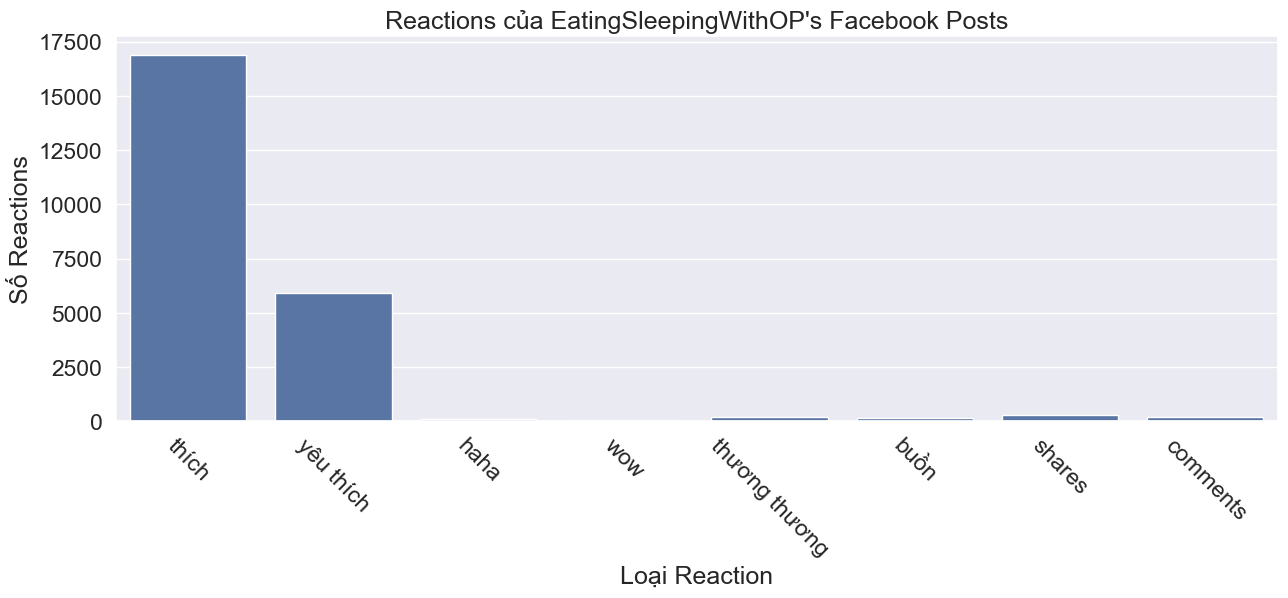

In [80]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(interactions.keys()), y=list(interactions.values()))
ax.set_title("Reactions của EatingSleepingWithOP's Facebook Posts")
ax.set_ylabel("Số Reactions")
ax.set_xlabel("Loại Reaction")
plt.xticks(rotation=-45)
plt.show()

In [81]:
df_filtered['post_len'] = df_filtered['post_text'].apply(len)

In [82]:
# Ma trận tương quan
corr_matrix = df_filtered[['reaction_count', 'comments', 'post_len']].corr()

print(corr_matrix)

                reaction_count  comments  post_len
reaction_count        1.000000  0.744534  0.042873
comments              0.744534  1.000000  0.061629
post_len              0.042873  0.061629  1.000000


Text(0.5, 1.0, 'Biểu đồ Heatmap - Sự tương quan giữa Reaction, Comments và độ dài bài viết')

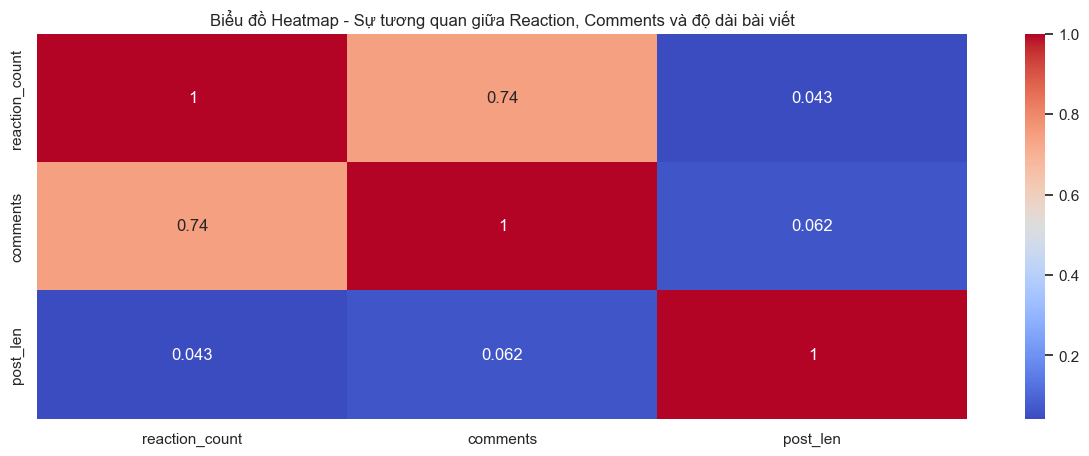

In [83]:
# Vẽ biểu đồ heatmap thể hiện tương quan
sns.set(style="white")  # Chọn giao diện màu sắc
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Biểu đồ Heatmap - Sự tương quan giữa Reaction, Comments và độ dài bài viết')


### Nhận xét

Trong khoảng thời gian này, OnePiece đã cho ta thấy những quá khứ đau khổ của một trong những nhân vật phụ được yêu thích nhất bộ truyện,Bartholomew Kuma. Với một quá khứ đầy đau khổ, Kuma đã chiếm được sự đồng cảm và quan tâm của cộng đồng dành cho mình có thể thấy rõ thông qua lượt tương tác đối với bài viết.

Về phía fanpage, bài viết không chỉ đề cập đến mặt tích cực và nhân văn của nhân vật Bartholomew Kuma trong thế giới One Piece mà còn so sánh với nhân vật John Coffey trong tác phẩm "The Green Mile." Bài viết này không chỉ là một mô tả về nhân vật trong manga/anime mà còn là một cái nhìn sâu sắc về những khía cạnh tâm lý và tình cảm trong những câu chuyện này. Bài viết này có thể được coi là một thành công trong việc kết nối với độc giả thông qua việc chia sẻ góc nhìn sâu sắc và nhận định độc đáo về nhân vật Bartholomew Kuma, đồng thời thể hiện khả năng sáng tạo và nghiên cứu sâu sắc.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Các khung giờ quen thuộc

In [84]:
# Tạo một cột mới 'post_hour' để nhóm dữ liệu theo giờ
df_filtered['post_hour'] = (df_filtered['time'].dt.hour ) 


In [85]:
df_filtered['post_hour']

0      14
1       9
2       8
3      20
4       0
       ..
119    20
120    17
121    14
122    11
123     9
Name: post_hour, Length: 124, dtype: int32

In [86]:
# Nhóm dữ liệu theo giờ và đếm số lượng bài đăng trong mỗi khoảng thời gian
post_per_hour = df_filtered.groupby('post_hour').size().reset_index(name='post_count')

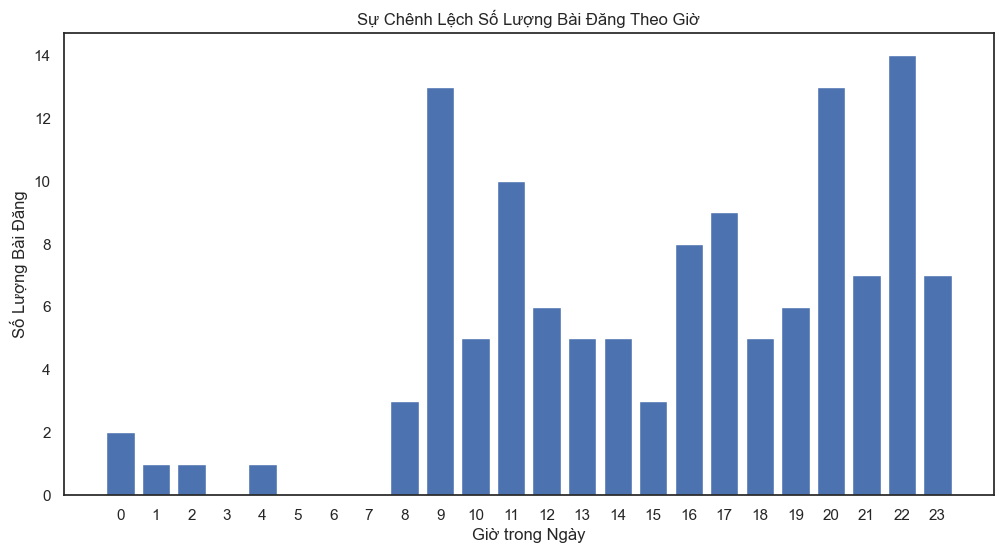

In [87]:
# lượng bài đăng theo thời gian
plt.figure(figsize=(12, 6))
plt.bar(post_per_hour['post_hour'], post_per_hour['post_count'])
plt.title('Sự Chênh Lệch Số Lượng Bài Đăng Theo Giờ')
plt.xlabel('Giờ trong Ngày')
plt.ylabel('Số Lượng Bài Đăng')
plt.xticks(range(24))
plt.show()

In [88]:
# Nhóm dữ liệu theo giờ và đếm số lượng tương tác trong mỗi khoảng thời gian
interaction_per_hour = df_filtered.groupby('post_hour')["total_interactions"].sum()

<Axes: xlabel='Giờ trong Ngày', ylabel='Số Lượng tương tác'>

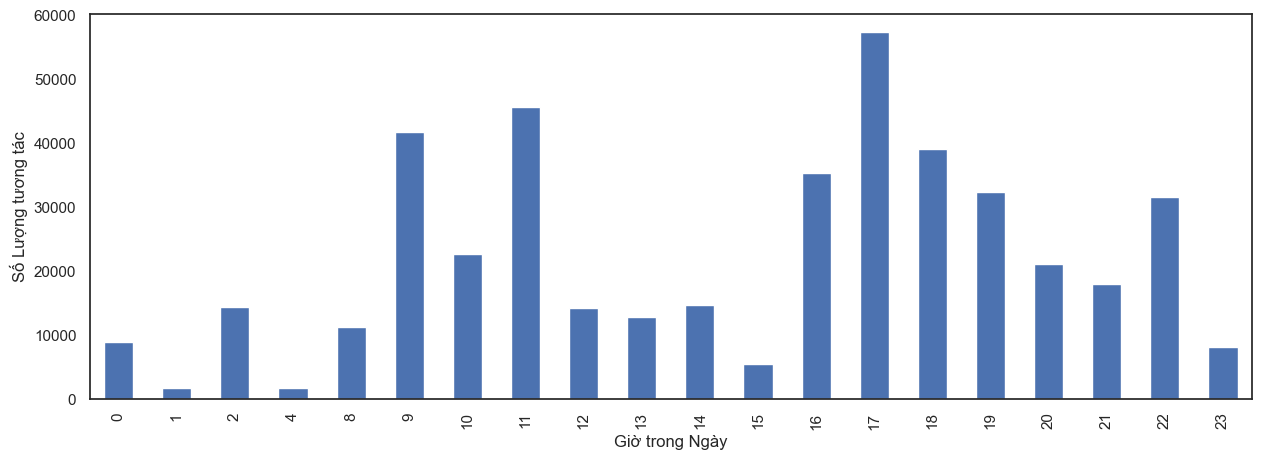

In [89]:
interaction_per_hour.plot(kind='bar', xlabel='Giờ trong Ngày', ylabel='Số Lượng tương tác')

In [90]:
# Lấy 3 thời điểm có số lượng bài đăng lớn nhất
top_3_hours = post_per_hour.nlargest(3, 'post_count')

# In ra kết quả
print("3 thời điểm có nhiều bài đăng nhất:")
for index, row in top_3_hours.iterrows():
    print(f"Giờ {row['post_hour']}:00 với {row['post_count']} bài đăng")


3 thời điểm có nhiều bài đăng nhất:
Giờ 22:00 với 14 bài đăng
Giờ 9:00 với 13 bài đăng
Giờ 20:00 với 13 bài đăng




### Nhận xét

Giờ 22:00: Là thời điểm có nhiều bài đăng nhất trong ngày với 14 bài. Vì "Hội Những Người Ăn Ngủ Cùng OnePiece" là một fanpage truyện tranh manga nên đối tượng và cộng đồng của fanpage đa phần là người trẻ nên đây là khoảng thời gian hoạt động mxh nhiều nhất của họ.

Giờ 9:00: Đứng ở vị trí thứ hai với 13 bài đăng, đây là thời điểm mọi người bắt đầu buổi sáng và sẽ lên mxh để tìm kiếm và đọc thông tin, tin tức cho ngày mới.

Giờ 20:00: Cũng đạt được 13 bài đăng và đứng ở vị trí thứ ba. Thời điểm này có thể là khi mọi người đã kết thúc công việc, ăn tối và có thêm thời gian để lướt Facebook, do đó nhiều bài đăng được đăng vào thời điểm này để tối ưu hóa tương tác.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Key Words

In [91]:
df_text = df_filtered[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,741647091330800,Quảng cáo phần Đảo Tương lai Egghead với Vegap...
1,741535364675306,Một nhân vật mới sẽ xuất hiện ở arc Egghead. N...
2,741527888009387,Áp phích quảng bá chính thức cho phần Egghead ...
3,741264904702352,Một số hình ảnh quảng cáo mới cho tập 1085 của...
4,740804658081710,"Chúc mừng sinh nhật, Charlotte Katakuri."
...,...,...
119,722967989865377,"Fan: Cháu muốn xem ""Thanh Long Okama"".\nOda: T..."
120,722844953211014,Giờ không có chỗ nào bảo Dragon là cựu Hải Quâ...
121,722776496551193,Mọi người khi thấy bé gái nào đó trong flashba...
122,722712159890960,"- Chap 1096: ""Kumachi"".\n- Trang bìa là tranh ..."


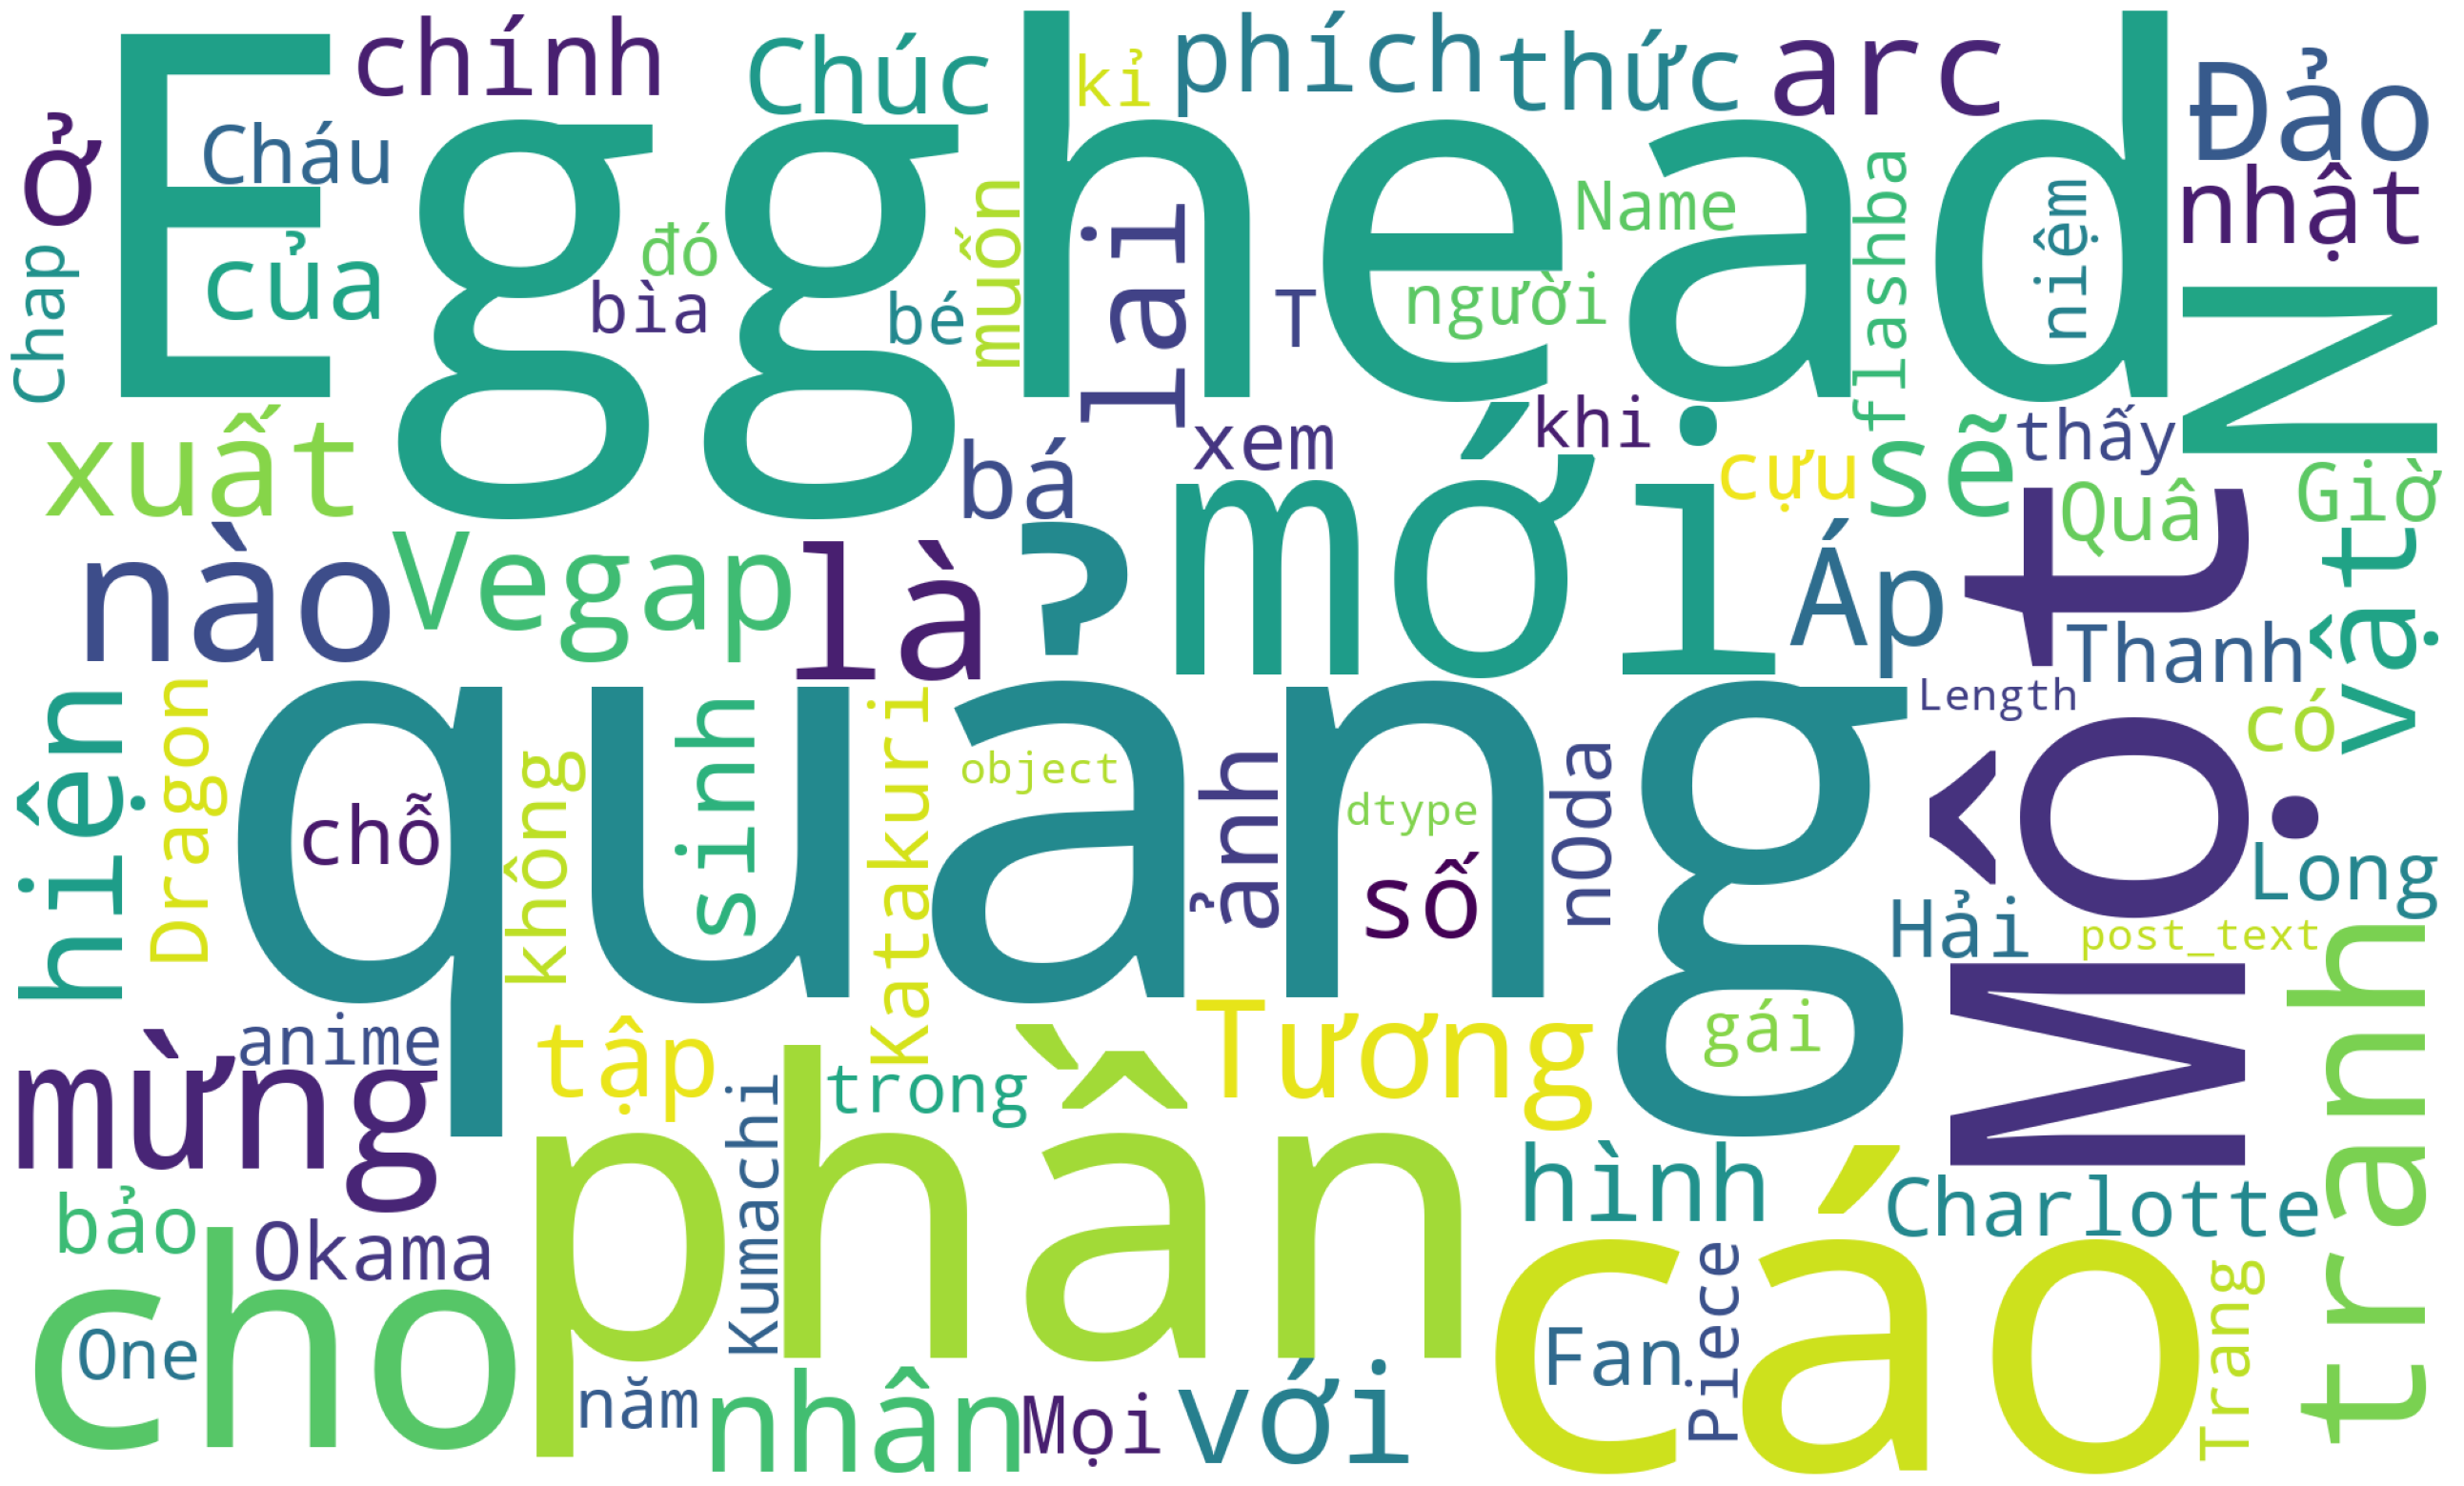

In [92]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Fan Cứng

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Tạo dataframe comment từ cột 'comments_full' của df gốc và xử lý 

In [93]:
# Tạo dataFrame để lấy các comments
df_cmt = pd.DataFrame()
for i in range(0,124):
    df = pd.DataFrame(eval(df_filtered['comments_full'][i]))
    df_cmt = pd.concat([df,df_cmt],ignore_index=True)  
    

C:\Users\ducle\AppData\Local\Temp\ipykernel_20100\4182435134.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cmt = pd.concat([df,df_cmt],ignore_index=True)
C:\Users\ducle\AppData\Local\Temp\ipykernel_20100\4182435134.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cmt = pd.concat([df,df_cmt],ignore_index=True)
C:\Users\ducle\AppData\Local\Temp\ipykernel_20100\4182435134.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fut

In [94]:
# Tìm id của fan_page để df_cmt chỉ còn những cmt của user
fan_page_id = df_cmt.loc[df_cmt['commenter_name'] == "Hội những người ăn ngủ cùng One Piece", 'commenter_id'].iloc[0]

In [95]:
# Xóa bỏ các dòng cmt của fan_page
df_cmt.drop(df_cmt[df_cmt['commenter_id'] == '100064565477350'].index, inplace=True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Phân tích

In [96]:
# Lấy số lượng cmt của mỗi user
cmt_count = df_cmt['commenter_id'].value_counts()

In [97]:
# Top 10 người cmt nhiều nhất
top_cmter = cmt_count.head(10)

In [98]:
# Lọc DataFrame để chỉ hiển thị thông tin của top 10 người
top_cmter_info = df_cmt[df_cmt['commenter_id'].isin(top_cmter.index)][['commenter_id', 'commenter_name']].drop_duplicates()
top_cmter_info = top_cmter_info.reset_index(drop=True)

# In ra thông tin top 10 người
print(top_cmter_info)


      commenter_id     commenter_name
0  100090118115504      Bernard Luong
1  100056923010813   Nguyễn Quốc Việt
2  100009867154423   Nguyễn Thế Dương
3  100003769099116           Đức Quân
4  100018606601667          Công Minh
5  100057211762360           Giang BA
6  100000012645880    Đào Lê Nhật Lâm
7  100034502745100       An Thái Trần
8  100000823353241  Nguyễn L. A. Tuấn
9  100010849693450   Trần Thái Dươngg


In [99]:
cmt_text = str(df_cmt["comment_text"])

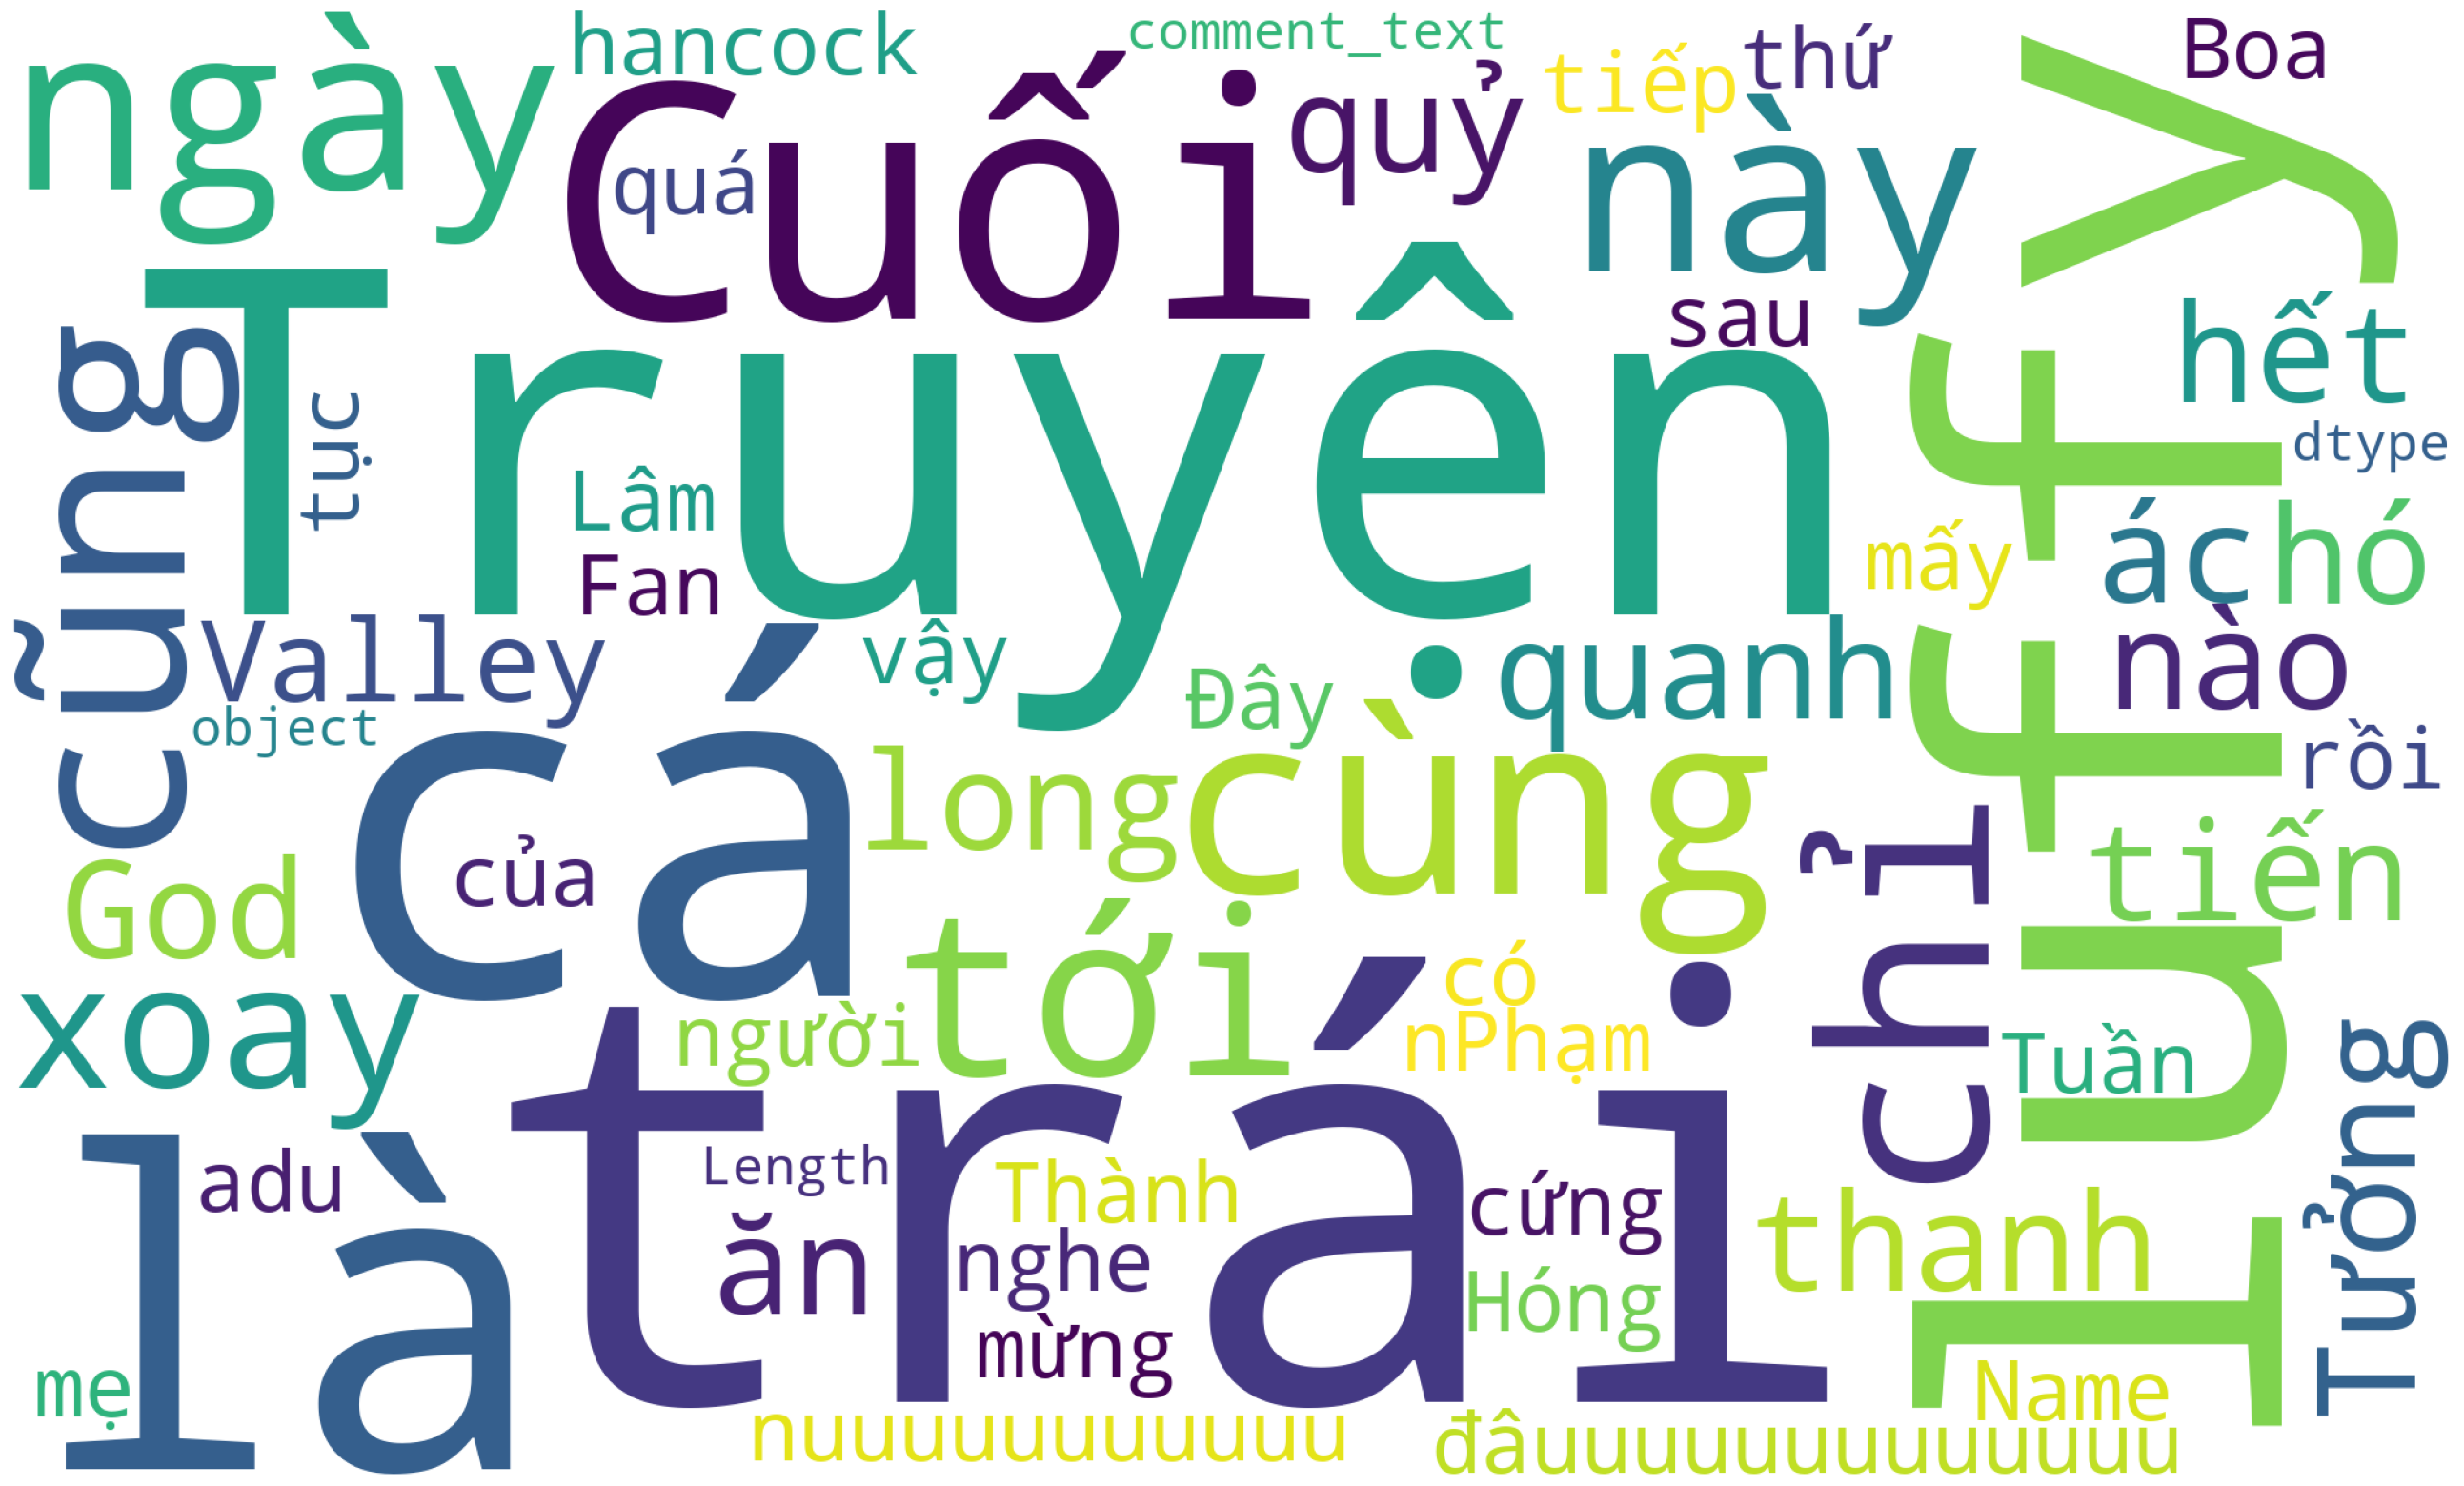

In [100]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(cmt_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### User
em đã thử crawl dữ liệu user nhưng không thành công vì bị chặn sau khoảng 50 tài khoản.

In [ ]:
import random
import time
user = []
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
for id in df_cmt['comments_full']:
    try:
        for profile in get_profile(id, options = {"Name":True, "Thông tin liên hệ và cơ bản": True,"Công việc và học vấn": True, "allow extra requests": True, "header": headers}, extra_info = True, cookies = "cookies.txt"):
            user.append(profile)
            random_time = random.randint(5,25)
            print(profile)
            time.sleep(random_time)
    except:
        continue

In [102]:
#file dữ liệu e đã thu thập được là 'Data/User.csv'
df_user = pd.read_csv('Data/Users.csv')

In [103]:
df_user

,Friend_count,Follower_count,Following_count,cover_photo_text,cover_photo,profile_picture,id,Name
0,NaN,NaN,NaN,Ảnh bìa: 'Người ta ngại tán anh\nTại ngán anh',https://scontent.fhan3-5.fna.fbcdn.net/v/t39.3...,https://scontent.fhan3-5.fna.fbcdn.net/v/t39.3...,100023453052788,Bạn tạm thời bị chặn
1,527.0,NaN,NaN,Ảnh bìa: Ảnh của Hải Seamen.,https://scontent.fhan3-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan3-2.fna.fbcdn.net/v/t39.3...,100073464424237,Bạn tạm thời bị chặn
2,1524.0,NaN,NaN,Ảnh bìa: Ảnh của Kiên KÒy.,https://scontent.fhan3-5.fna.fbcdn.net/v/t39.3...,https://scontent.fhan3-2.fna.fbcdn.net/v/t39.3...,100003063142087,Bạn tạm thời bị chặn
3,NaN,NaN,NaN,NaN,NaN,https://scontent.fhan3-3.fna.fbcdn.net/v/t39.3...,100085642560231,Bạn tạm thời bị chặn
4,NaN,NaN,NaN,Ảnh bìa: Ảnh của Chi Cuong.,https://scontent.fhan3-4.fna.fbcdn.net/v/t1.18...,https://scontent.fhan4-3.fna.fbcdn.net/v/t1.18...,100003779950137,Bạn tạm thời bị chặn
...,...,...,...,...,...,...,...,...
1239,NaN,NaN,NaN,Ảnh bìa: 'time to fix bug',https://scontent.fhan4-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan4-1.fna.fbcdn.net/v/t39.3...,100017912416049,Bạn tạm thời bị chặn
1240,NaN,NaN,NaN,NaN,NaN,NaN,100003255116455,Bạn tạm thời bị chặn
1241,311.0,NaN,NaN,Ảnh bìa: Ảnh của Phạm Lâm.,https://scontent.fhan4-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan4-2.fna.fbcdn.net/v/t39.3...,100006937303455,Bạn tạm thời bị chặn
1242,1335.0,NaN,NaN,Ảnh bìa: Ảnh của Tony Hoàng Anh.,https://scontent.fhan4-1.fna.fbcdn.net/v/t1.64...,https://scontent.fhan3-5.fna.fbcdn.net/v/t39.3...,100041785450389,Bạn tạm thời bị chặn


In [104]:
# Lưu trữ các tên cột bạn muốn giữ lại
desired_columns = ["Name","ID","Nơi từng sống", "Công việc và học vấn", "Thông tin liên hệ và cơ bản", "Sự kiện trong đời","Tổng quan"]

## Sanji VS Zoro

### xử lý dữ liệu

In [105]:
# Lọc dữ liệu cho Sanji từ df
sanji_data = df_filtered[df_filtered['post_text'].str.contains('Sanji', case=False)]

# Lọc dữ liệu cho Zoro từ df
zoro_data = df_filtered[df_filtered['post_text'].str.contains('Zoro', case=False)]

In [106]:
# Một bước lọc để chắc chắn các bài viết chỉ nói về 2 nhân vật được so sánh
zoro_data =  zoro_data[zoro_data['post_text'].str.contains(r'\b(shimotsuki|sinh nhật|Roronoa)\b', case=False, regex=True)]
sanji_data = sanji_data[sanji_data['post_text'].str.contains(r'\b(Ivankov|Okama|Vinsmoke)\b', case=False, regex=True)]

C:\Users\ducle\AppData\Local\Temp\ipykernel_20100\839267125.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  zoro_data =  zoro_data[zoro_data['post_text'].str.contains(r'\b(shimotsuki|sinh nhật|Roronoa)\b', case=False, regex=True)]
C:\Users\ducle\AppData\Local\Temp\ipykernel_20100\839267125.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sanji_data = sanji_data[sanji_data['post_text'].str.contains(r'\b(Ivankov|Okama|Vinsmoke)\b', case=False, regex=True)]


### phân tích

In [107]:


# Tính tổng tương tác và số lượng bài đăng cho Sanji
total_interactions_sanji = sanji_data['total_interactions'].sum()
total_posts_sanji = len(sanji_data)

# Tính tổng tương tác và số lượng bài đăng cho Zoro
total_interactions_zoro = zoro_data['total_interactions'].sum()
total_posts_zoro = len(zoro_data)

# Tính tỉ lệ tương tác trung bình cho Sanji và Zoro
average_interaction_rate_sanji = total_interactions_sanji / total_posts_sanji
average_interaction_rate_zoro = total_interactions_zoro / total_posts_zoro

# Tìm bài đăng có lượt tương tác lớn nhất của 2 nhân vật
max_interaction_sanji = sanji_data["total_interactions"].max()
max_interaction_zoro = zoro_data["total_interactions"].max()

# In kết quả
print(f'Tỉ lệ tương tác trung bình cho Sanji: {int(average_interaction_rate_sanji)}')
print(f'Tỉ lệ tương tác trung bình cho Zoro: {int(average_interaction_rate_zoro)}')


Tỉ lệ tương tác trung bình cho Sanji: 1247
Tỉ lệ tương tác trung bình cho Zoro: 4154


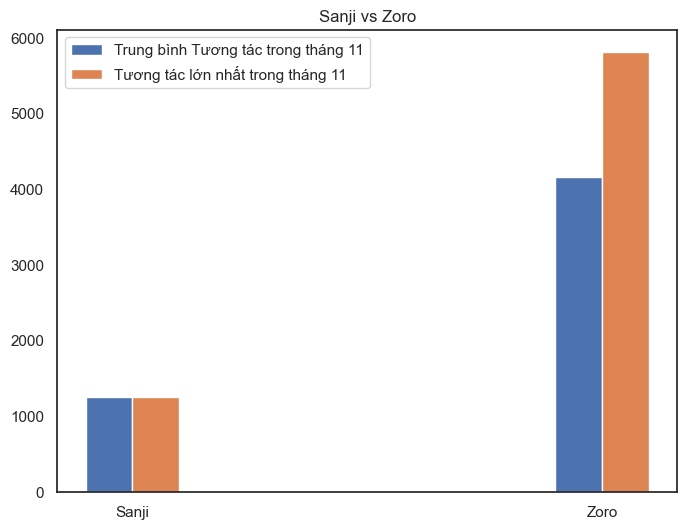

In [108]:
# Dữ liệu để vẽ biểu đồ
characters = ['Sanji', 'Zoro']
average_interaction_rates = [average_interaction_rate_sanji, average_interaction_rate_zoro]
max_interactions = [max_interaction_sanji, max_interaction_zoro]

# Tạo mảng indices cho các nhóm cột
indices = np.arange(len(characters))

# Chiều rộng của mỗi cột
bar_width = 0.1

# Tạo biểu đồ cột ghép
fig, ax = plt.subplots(figsize=(8,6))

# Cột cho tỉ lệ tương tác trung bình
bar1 = ax.bar(indices, average_interaction_rates, bar_width, label='Trung bình Tương tác trong tháng 11')

# Cột cho lượng tương tác lớn nhất
bar2 = ax.bar( indices+bar_width, max_interactions, bar_width, label='Tương tác lớn nhất trong tháng 11')

# Đặt các chỉ số cho các nhóm cột và các nhãn trục x
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(characters)

# Thêm chú thích và tiêu đề
ax.legend()
plt.title('Sanji vs Zoro')

# Hiển thị biểu đồ
plt.show()


nhận xét chung, với fan onepiece thì tháng 11 được coi là tháng của Zoro nên ta có thể thấy lượng tương tác giữa 2 nhân vật có sự chênh lệch tương đối rõ rệt